In [2]:
'''Logistic Regression to predict virginica class based on 
petal width feature only'''
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import numpy as np
pd.options.mode.chained_assignment = None
import warnings
warnings.filterwarnings('ignore')
import statsmodels.formula.api as smf
from sklearn.preprocessing import add_dummy_feature
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor
from sklearn.datasets import load_iris


In [4]:
iris = load_iris(as_frame=True)
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [6]:
iris.data.sample(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
89,5.5,2.5,4.0,1.3
63,6.1,2.9,4.7,1.4


In [7]:
iris.target.sample(2)

83     1
124    2
Name: target, dtype: int64

In [8]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [23]:
x = iris.data[['petal width (cm)']].values
y = (iris.target.values==2)
x_train, x_test, y_train, y_test = train_test_split(x,y,
                                                   train_size=0.25)
logistic_reg = LogisticRegression()
logistic_reg.fit(x_train,y_train)

LogisticRegression()

In [40]:
# always check which column is classifying True:
logistic_reg.classes_
# Thus 1st column is not virginica (!=2 defined in y) and 2nd column is virginica

array([False,  True])

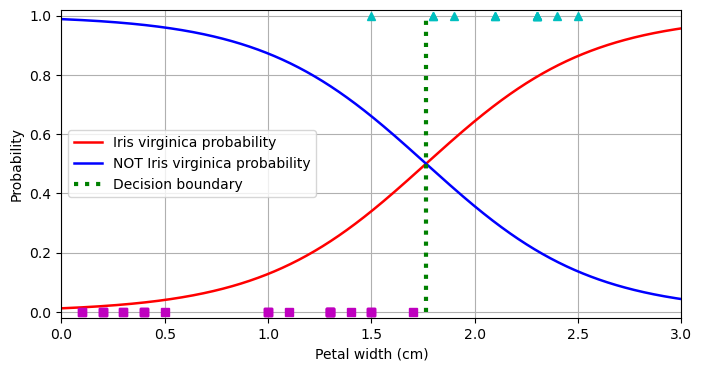

In [112]:
x_topredict = np.linspace(0,3,1000).reshape(-1,1)
x_topredict.shape
y_prob = logistic_reg.predict_proba(x_topredict)
decision_boundary=x_topredict[y_prob[:,1] > 0.5][0][0]
plt.figure(figsize=(8, 4))
plt.plot(x_topredict,y_prob[:,1],'r-',linewidth=1.8,
         label='Iris virginica probability')
plt.plot(x_topredict,y_prob[:,0],'b-',linewidth=1.8,
         label='NOT Iris virginica probability')
plt.plot([decision_boundary,decision_boundary],[0,1],'g:',
        label="Decision boundary",linewidth=3)
plt.plot(x_train[y_train == 0], y_train[y_train == 0], "ms")
plt.plot(x_train[y_train == 1], y_train[y_train == 1], "c^")

plt.axis([0, 3, -0.02, 1.02])
plt.xlabel("Petal width (cm)")
plt.ylabel("Probability")
plt.legend()
plt.grid()
plt.show()

In [96]:
decision_boundary

1.7657657657657657

In [114]:
'''now using predict instead of probabilities to see if it outputs the 
right results for locations it is not so confident about using probability'''
logistic_reg.predict([[1.7]]),logistic_reg.predict([[1.8]])

(array([False]), array([ True]))

In [ ]:
'''From those resutls we can see slightly to the left/right of the 
decision boundary, it outputs the correct classification of not virginica
class/virginica class respectively as can be confirmed on red plot above'''